# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


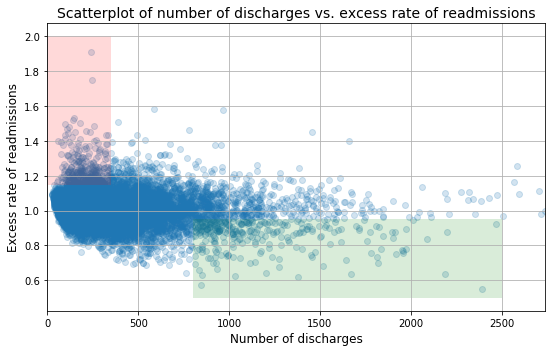

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [5]:
clean_hospital_read_df[70:83]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16086,BAYLOR EMERGENCY MEDICAL CENTER,670062,TX,READM-30-PN-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16129,BRISTOW MEDICAL CENTER,370041,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14075,HEREFORD REGIONAL MEDICAL CENTER,450155,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14066,HOSPITAL OF UNIV OF PENNSYLVANIA,390111,PA,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16201,BAYLOR SURGICAL HOSPITAL AT LAS COLINAS,450874,TX,READM-30-PN-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14865,"MEMORIAL HOSPITAL, INC TOWANDA",390236,PA,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16213,BAYLOR MEDICAL CENTER AT FRISCO,450853,TX,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16234,BAPTIST EMERGENCY HOSPITAL,670078,TX,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16317,JAMESTOWN REGIONAL MEDICAL CENTER,440083,TN,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16339,UNM SANDOVAL REGIONAL MEDICAL CENTER,320089,NM,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# Your turn

In [7]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


**Q1 Do you agree with the above analysis and recommendations? Why or why not?**

I don't entirely agree with the above Preliminary report because of missing sound statistical analysis and analysis was based only on graph. Below are my critique.

* The missing data was handled properly above by dropping rows with null values (except for Footnote columns)
* Initial observations is entirely based on plot alone and not tested for statistical significance and correlation coefficient was not calculated

* In the statistical analysis - There is no "Hypothesis test" done and hospital capacity was grouped only into two: number of discharges <100 and number of discharges >1000. The group of "100 <=number of discharges<=1000" was left out. This means the calculated percentages of hospitals with excess readmission rate (63% and 44%) is only for the two groups missing a big chunk of the hospitals in the population.

* conclusions were not back up with a solid statistical analysis and Hypothesis testing for proof

* In the statistics part, hospital capacity was divided in two groups which can imply that small hospitals have number of discharges <100. However in the recommendation part, small capacity hospitals was defined as hospitals with number of discharges <300 which is inconsistent and can create confusion

In [8]:
clean_hospital_read_df.notnull().sum()
#There are still few null values present the the Ratios.

Hospital Name                 11578
Provider Number               11578
State                         11578
Measure Name                  11578
Number of Discharges          11578
Footnote                         81
Excess Readmission Ratio      11497
Predicted Readmission Rate    11497
Expected Readmission Rate     11497
Number of Readmissions        11497
Start Date                    11578
End Date                      11578
dtype: int64

In [9]:
# lets clean it further to have no null values in the datafraes except in Footnote. 
#As footnote is not required we can even remove it from our Dataframe
new = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]

In [10]:
new.notnull().sum()
# ow we have the data in all the columns

Hospital Name                 11497
Provider Number               11497
State                         11497
Measure Name                  11497
Number of Discharges          11497
Footnote                          0
Excess Readmission Ratio      11497
Predicted Readmission Rate    11497
Expected Readmission Rate     11497
Number of Readmissions        11497
Start Date                    11497
End Date                      11497
dtype: int64

In [11]:
new.reset_index(inplace=True)

In [12]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11497 entries, 0 to 11496
Data columns (total 13 columns):
index                         11497 non-null int64
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(2), object(5)
memory usage: 1.1+ MB


In [13]:
new.corr()

,index,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
index,1.000000,0.022592,0.076031,NaN,-0.926960,-0.256798,-0.016791,-0.138984
Provider Number,0.022592,1.000000,-0.008849,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,0.076031,-0.008849,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.926960,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.256798,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.016791,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.138984,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


In [14]:
df100 = new[new['Number of Discharges'] < 100]
df1000 = new[new['Number of Discharges'] > 1000]

In [15]:
x100 = df100['Number of Discharges']
y100 = df100['Excess Readmission Ratio']
x1000 = df1000['Number of Discharges']
y1000 = df1000['Excess Readmission Ratio']

# B Statistics validation
Below calculation validates the stattistics provided and confirms that statistics is correct

In [16]:
# 63% have excess readmission rate greater than 1
a= len(df100) #number of hospitals with <100
ratio= df100[(df100["Excess Readmission Ratio"]>1)]
b= len(ratio["Excess Readmission Ratio"])
percentage=round((float(b)/a)*100,2)

mean_100 = round(df100["Excess Readmission Ratio"].mean(),4)

print("The mean of excess readmission rate is : ",mean_100," and the excess readmition rate is: "
       ,percentage, '%')

The mean of excess readmission rate is :  1.0226  and the excess readmition rate is:  63.22 %


In [17]:
# 44% have excess readmission rate greater than 1
a= len(df1000) #number of hospitals with <100
ratio= df1000[(df1000["Excess Readmission Ratio"]>1)]
b= len(ratio["Excess Readmission Ratio"])
percentage=round((float(b)/a)*100,2)

mean_1000=round(df1000["Excess Readmission Ratio"].mean(),4)

print("The mean of excess readmission rate is : ",mean_1000,
      " and the excess readmition rate is: ",percentage, '%')

The mean of excess readmission rate is :  0.9783  and the excess readmition rate is:  44.49 %


# C Validation

Setup an hypothesis test for $\alpha$ = .01

**Ho: There is no significant correlation between hospital capacity(number of discharges) and readmission rates**

**H1: There is significant correlation between hospital capacity(number of discharges) and readmission rates**

In [18]:
from scipy.stats.stats import pearsonr
import scipy as stats
def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    rsqu = r**2
    return r, p, lo, hi,rsqu

In [19]:
xall = new['Number of Discharges']
yall = new['Excess Readmission Ratio']
x = pearsonr_ci(xall, yall,0.01) # alpha = 0.01 that is 99% 

print('Co relation between the variables is ', x[0])
print('P value for the corelation is ', x[1])
print('Confidence Interval of the Co relation is ' , x[2], ' and ', x[3])
print('R squared value is  ' , x[4])

Co relation between the variables is  -0.09739794351079353
P value for the corelation is  1.222547377680967e-25
Confidence Interval of the Co relation is  -0.121135908608288  and  -0.07354864167887251
R squared value is   0.009486359400131728


pvalue<0.05 so we can reject Ho and accept H1: There is significant correlation between hospital capacity and excess readmission ratio.
Though correlation coefficient for number of discharges and excess readmission rate (-0.097398)- this number is statistically significant

The negative sign of the correlation coefficient means number of discharges and excess readmission rate has a negative correlation, a very small correlation. Meaning as the number of discharges increase there is a very very small increase in the excess readmission ratio.

Looking at the r_squared (pearson correlation coefficient squared) which is <1%, this means only <1% of variability in the exess readmission ratio can be explained by number of discharges.

In [20]:
# Lets do the same hypothesis for less than 100 discharges
xpear100 = pearsonr_ci(x100, y100,0.01) # alpha = 0.01 that is 99% 

print('Co relation between the variables is ', xpear100[0])
print('P value for the corelation is ', xpear100[1])
print('Confidence Interval of the Co relation is ' , xpear100[2], ' and ', xpear100[3])
print('R squared value is  ' , xpear100[4])

# There is a significant stastistical negative correlation when the Number of dichahrge 
#is less than 100 (A small hospital or facility)

#So the conclusion mentioned ::
#"Smaller hospitals/facilities may be lacking necessary resources to ensure quality care 
#and prevent complications that lead to readmissions." is true aks the P values is very low 
# almost 6 % of variabilty in the exess readmission ratio can be explained by number of discharges. 

Co relation between the variables is  -0.2446355003347625
P value for the corelation is  1.195592784553268e-17
Confidence Interval of the Co relation is  -0.31359334713442755  and  -0.17311086515235888
R squared value is   0.059846528024039586


In [21]:
# Lets do the same hypothesis for less than 100 discharges

xpear1000 = pearsonr_ci(x1000, y1000,0.01) # alpha = 0.01 that is 99% 

print('Co relation between the variables is ', xpear1000[0])
print('P value for the corelation is ', xpear1000[1])
print('Confidence Interval of the Co relation is ' , xpear1000[2], ' and ', xpear1000[3])
print('R squared value is  ' , xpear1000[4])

# With alpha as 1 % this test is failed to reject the null hypothesis and thus there is no statistical significance that there
# is any correlation when the Number of dichahrge is more than 1000 (A big hospital or facility).


Co relation between the variables is  -0.0792766567903635
P value for the corelation is  0.08839944177056586
Confidence Interval of the Co relation is  -0.19693514720939764  and  0.040632911380278205
R squared value is   0.0062847883118570865


# Recommendations:
**With the statistical inferences, I would suggest that Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.**

**Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.**


The scatter plot is the best plot to find correlation of two variables, however the biggest disadvantage of it is, it was designed to be used with very few data points but today we have millions and millions of data points to work with. If we look at the above scatter plot it is impossible to find indentify a single data point in the section where number of discharges ranges from 0 to 750.

We may look at the below graph to look at the better result with eye

In [22]:
hosp1=new[new['Excess Readmission Ratio']<=1]
hosp2=new[new['Excess Readmission Ratio']>1]

In [23]:
## Calclating Equation of Trend Line
from scipy import stats  
x=new['Number of Discharges']
y=new['Excess Readmission Ratio']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [24]:
X=new['Number of Discharges'].sort_values()
y_trend=(-2.901e-05)*X + 1.02

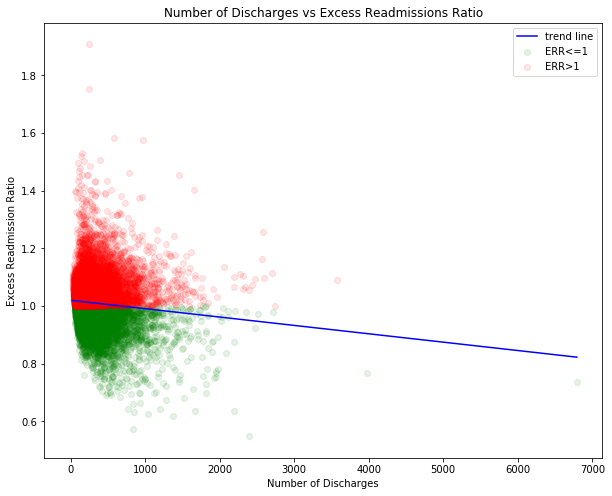

In [25]:
plt.subplots(figsize=(10,8))
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='g', label="ERR<=1", alpha=0.1)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.plot(X, y_trend, c='b', label='trend line')

plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()